# Network Dynamics: Bipartite Graphs - Lab

## Introduction
Let's put our understanding of bipartite graphs to practice. In this lab , we shall look at analyzing bipartite graph of individuals and organizations they belonged to, during the times of American revolution. We shall also look at making a meaningful visualization of the node relationships. 


## Objectives
You will be able to:

- Understand and describe Bipartite graphs in comparison with uni-partite graphs
- Define and analyze bipartite graphs in networkx
- Understand how centrality measures work with bipartite graphs
- Visualize Bipartite graphs


## American Revolution Dataset

This bipartite network contains membership information a number of people in different organisations dating back to the time before the American Revolution. We have this dataset available for you as a csv file `american-revolution.csv`. Load this into a dataframe and inspect the format. Remember we need an edge list to carry on with our analysis. 


The list includes well-known people such as the American activist Paul Revere. Left nodes represent persons and right nodes represent organisations. An edge between a person and an organization shows that the person was a member of the organisation.

## Load Data
- Load the csv file into pandas dataframe and inspect its contents

In [13]:
## Load necessary libraries
import pandas as pd
import numpy as np
import networkx as nx
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# Read and inspect the dataset
df = pd.read_csv('american-revolution.csv')
df = df.set_index('Unnamed: 0')
df.head()
# Code here

,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies
Unnamed: 0,,,,,,,
Adams.John,0,0,1,1,0,0,0
Adams.Samuel,0,0,1,1,0,1,1
Allen.Dr,0,0,1,0,0,0,0
Appleton.Nathaniel,0,0,1,0,0,1,0
Ash.Gilbert,1,0,0,0,0,0,0


Right so this is not an edge list, rather shows the relationships of individuals with organizations in a matrix form. We need to convert this data into an edge list dataframe. So lets get to it .

## Create edge list
- Convert the individual-club associations into an edge list. You can use the process we saw earlier via graph processing OR use some Python parsing goodness . 

[('Adams.John', 'NorthCaucus'), ('Adams.John', 'LongRoomClub'), ('Adams.Samuel', 'NorthCaucus'), ('Adams.Samuel', 'LongRoomClub'), ('Adams.Samuel', 'BostonCommittee'), ('Adams.Samuel', 'LondonEnemies'), ('Allen.Dr', 'NorthCaucus'), ('Appleton.Nathaniel', 'NorthCaucus'), ('Appleton.Nathaniel', 'BostonCommittee'), ('Ash.Gilbert', 'StAndrewsLodge'), ('Austin.Benjamin', 'LondonEnemies'), ('Austin.Samuel', 'LondonEnemies'), ('Avery.John', 'LoyalNine'), ('Avery.John', 'LondonEnemies'), ('Baldwin.Cyrus', 'LondonEnemies'), ('Ballard.John', 'NorthCaucus'), ('Barber.Nathaniel', 'NorthCaucus'), ('Barber.Nathaniel', 'TeaParty'), ('Barber.Nathaniel', 'BostonCommittee'), ('Barber.Nathaniel', 'LondonEnemies'), ('Barnard.Samuel', 'TeaParty'), ('Barrett.Samuel', 'StAndrewsLodge'), ('Barrett.Samuel', 'LondonEnemies'), ('Bass.Henry', 'LoyalNine'), ('Bass.Henry', 'NorthCaucus'), ('Bass.Henry', 'TeaParty'), ('Bass.Henry', 'LondonEnemies'), ('Bell.William', 'StAndrewsLodge'), ('Blake.Increase', 'StAndrewsLo

,source,target
0,Adams.John,NorthCaucus
1,Adams.John,LongRoomClub
2,Adams.Samuel,NorthCaucus
3,Adams.Samuel,LongRoomClub
4,Adams.Samuel,BostonCommittee


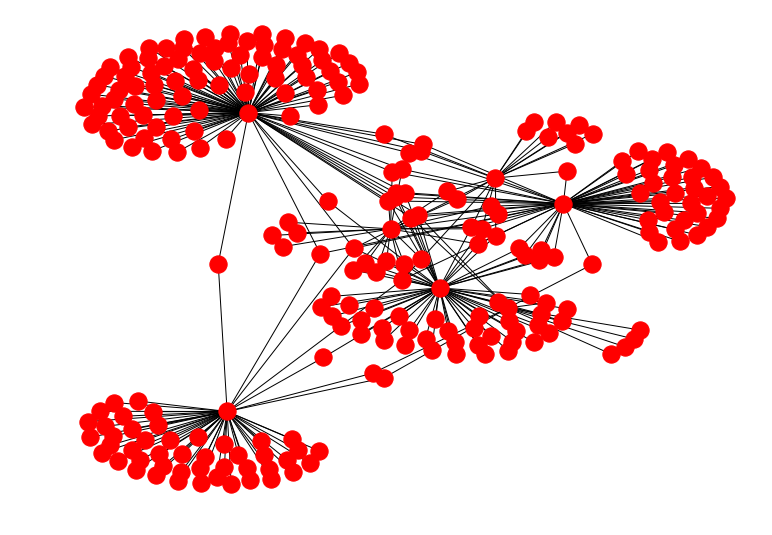

In [28]:
# Create Edge list from CSV file
names = list(df.index)
orgs = list(df.columns)
node_names = names + orgs
#print(node_names)

num_names = len(names)
num_orgs = len(orgs)
mat_size = num_names + num_orgs

vals = df.values
mat = np.zeros((mat_size, mat_size))

for i in range(0, num_names):
    col = 0
    for j in range(num_names, mat_size):
        mat[i, j] = vals[i, col]
        col += 1

    # Code here 
G = nx.from_numpy_matrix(mat)
label_mapping = dict(zip(G.nodes(), node_names))
G = nx.relabel_nodes(G, label_mapping)
plt.figure(figsize=(10,7))
nx.draw(G, with_labels=False)

# Save edge list as pandas dataframe and view head
edge_df = pd.DataFrame(columns = ['source', 'target'])
for s, t in G.edges():
    edge_df = edge_df.append(pd.DataFrame({'source': s, 'target': t}, index = [0]), ignore_index = True)
edge_df.head()
# Code here

Great, this makes much more sense. Now we can move further and import this as a networkx graph. 

## Convert edge list to `networkx` graph

-  Read each row as an **edge** with a **source** and a **target**. 
-  Set `name` and `organization` attributes for each edge
-  Visualize the graph

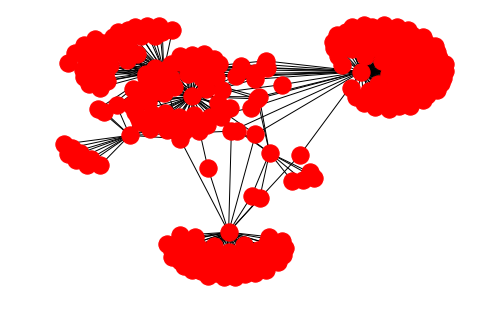

In [45]:
# Create and draw the graph
edge_df['name'] = edge_df.apply(lambda x: x['source'] if x['source'] in names else x['target'], axis=1)
edge_df['organization'] = edge_df.apply(lambda x: x['source'] if x['source'] in orgs else x['target'], axis=1)
edge_list = []
for row in edge_df.iterrows():
    edge_list.append((row[1][0], row[1][1], {'name': row[1][2], 'organization': row[1][3]}))
edge_list[:10]
# Code here 
G = nx.Graph(edge_list)
nx.draw(G, with_labels=False)


We can see the graph is not very revealing at the moment. Adding labels to it would just make it look worse due to occlusion. Also, both individuals and organizations are being shown similarly. How about differentiating clubs from individuals using visual cues like size and color. Let's have a go at it. 

## Visualize the Graph

We would need some list comprehensions and other coding skills to get a meaningful visualization. Let's try to break it down and do it bit by bit. As a first step do the following:
- Make a list of all the organizations from our final edge list dataframe. 

In [16]:
# Make a list of the organizations,

    # Code here

['NorthCaucus',
 'BostonCommittee',
 'LongRoomClub',
 'LondonEnemies',
 'LoyalNine',
 'StAndrewsLodge',
 'TeaParty']

- Similarly make a list of all unique individuals in the dataframe

In [33]:
# Make a list of the people


    # Code here 

['Brackett.Jos', 'Flagg.Josiah', 'Chadwell.Mr', 'Burt.Benjamin', 'Howard.Samuel', 'Roylson.Thomas', 'Hunnewell.Jonathan', 'Whitwell.William', 'Fenno.Samuel', 'Collier.Gershom', 'Hancock.John', 'Kimball.Thomas', 'Isaac.Pierce', 'Hammond.Samuel', 'Hooton.John', 'Bradlee.Nathaniel', 'Hopkins.Caleb', 'Bradford.John', 'MacKintosh.Capt', 'Wingfield.William', 'Loring.Matthew', 'Boit.John', 'Edes.Benjamin', 'Brimmer.Herman', 'Prentiss.Henry', 'Spurr.John', 'Stevens.Ebenezer', 'Barber.Nathaniel', 'Williams.Jeremiah', 'Breck.William', 'May.John', 'White.Samuel', 'Merrit.John', 'Ballard.John', 'Moody.Samuel', 'Stoddard.Jonathan', 'Boyer.Peter', 'Moore.Thomas', 'Prince.Job', 'Cazneau.Capt', 'Brown.Hugh', 'Bradlee.David', 'Collins.Ezra', 'Hoskins.William', 'Hitchborn.Nathaniel', 'Pitts.Samuel', 'Whitwell.Samuel', 'Colesworthy.Gilbert', 'Cleverly.Stephen', 'Phillips.William', 'Obear.Israel', 'Austin.Benjamin', 'Waldo.Benjamin', 'Molineux.William', 'Swan.James', 'Tyler.Royall', 'Shed.Joseph', 'Peck.T

- Make a list of all the popular people, i.e. with degree > 1 

In [70]:
# Popular ppl with degree > 1
from operator import itemgetter
from networkx.algorithms import bipartite

deg_cent = bipartite.degree_centrality(G, names)
sorted(deg_cent.items(), key=itemgetter(1), reverse=True)[0:10]
popular = sorted(deg_cent.items(), key=itemgetter(1), reverse=True)[0:10]
popular = [x[0] for x in popular]
popular
    # Code here 

['Warren.Joseph',
 'Revere.Paul',
 'Barber.Nathaniel',
 'Church.Benjamin',
 'Bass.Henry',
 'Chase.Thomas',
 'Adams.Samuel',
 'Proctor.Edward',
 'Urann.Thomas',
 'Grant.Moses']

## Calculate Degree
- Calculate the connection `LoyalNine` origanization has.

In [56]:
# Calculate the connection LoyalNine origanization has
deg_X, deg_Y = bipartite.degrees(G, orgs)
print(deg_Y)
dco2 = {key: deg_cent_org[key] for key in deg_cent_org.keys() - names}
sorted(dco2.items(), key=itemgetter(1), reverse=True)[0:10]
    # Code here

[('StAndrewsLodge', 53), ('BostonCommittee', 21), ('NorthCaucus', 59), ('LondonEnemies', 62), ('LoyalNine', 10), ('LongRoomClub', 17), ('TeaParty', 97)]


AttributeError: 'tuple' object has no attribute 'keys'

- Show the degree of all Organizations

In [23]:
# Code here

[59, 21, 17, 62, 10, 53, 97]

## Visualizations
So let's get on with visualizations. It is recommended that you execute one step at a time and inspect the results before moving on. You can change settings for the plot to what suits your eyes better.

Perform following tasks first:
1. Create an empty canvas with figure size=15,15
1. Create a spring layout with our graph `G`.
1.  Go through every organization name in `orgs`, ask the graph how many connections it has. Multiply that by 100 to get the circle size
1.  Use `nx.draw_networkx_nodes()` to draw the organizations with size calculated in the last step. Let's also color these `skyblue` (or one you prefer)
1. Repeat last two steps for individuals in the `ppl` list. In `nx.draw_networkx_nodes()` use color `darkgrey` and node size = 100
1. Repeat the process for third time, with popular people this time. use node size = 300 and color `salmon`. These might overlap a bit so set alpha = 0.5
1. Now draw all the edges with `nx.draw_networkx_edges()`. set edge width = 2 and edge color as `lightgrey`.
1. Create labels for the organizations (i.e. organization names) and draw these with `nx.draw_networkx_labels()`, set font size = 15.
1. Set Plot Title as show.

{'StAndrewsLodge': 'StAndrewsLodge', 'LoyalNine': 'LoyalNine', 'NorthCaucus': 'NorthCaucus', 'LongRoomClub': 'LongRoomClub', 'TeaParty': 'TeaParty', 'BostonCommittee': 'BostonCommittee', 'LondonEnemies': 'LondonEnemies'}


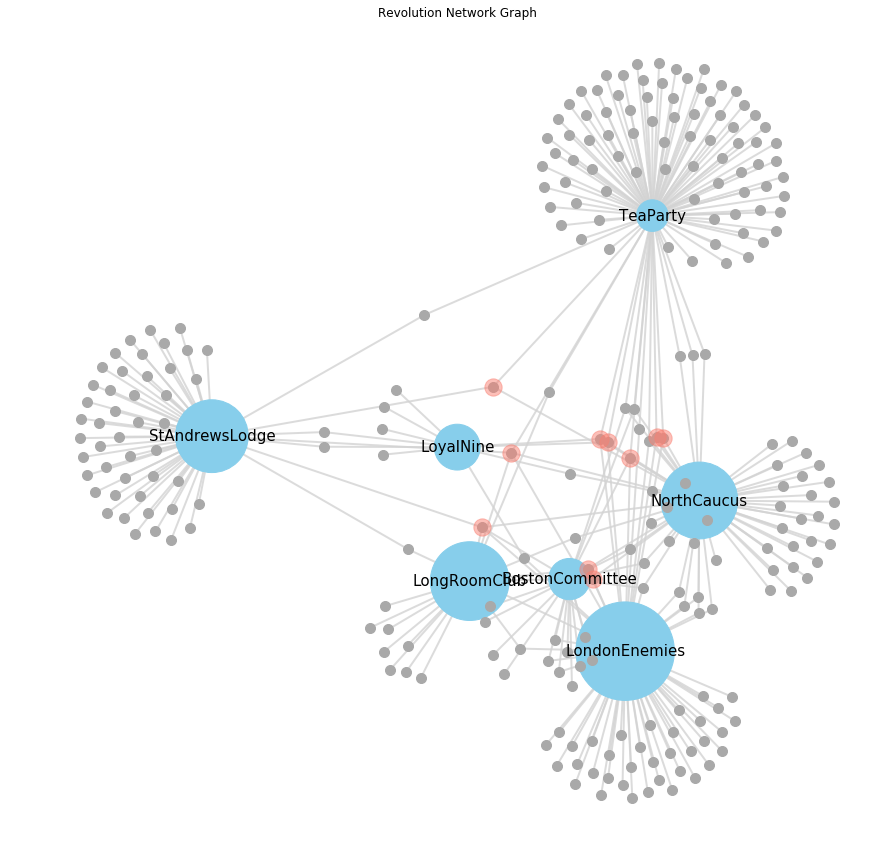

In [82]:
# 1. Fig size
fig, ax = plt.subplots(figsize = (15,15))
plt.axis('off')

# 2. Create a layout for our nodes 
layout = nx.spring_layout(G)

# 3. Create org node size as degree*100
deg_X, deg_Y = bipartite.degrees(G, orgs)
org_size = dict(deg_Y)
org_size = {key: org_size[key]*100 for key in org_size.keys()}
#print(org_size)

# 4. Draw the organizational nodes
nx.draw_networkx_nodes(G, pos = layout, nodelist = orgs, node_size = list(org_size.values()), node_color = 'skyblue')

# 5. Draw all the people
nx.draw_networkx_nodes(G, pos = layout, nodelist = names, node_size = 100, node_color = 'darkgrey')


# 6. Draw popular individuals
nx.draw_networkx_nodes(G, pos = layout, nodelist = popular, node_size = 300, node_color = 'salmon', alpha = 0.5)


# 7. Draw all the edges for the graph
nx.draw_networkx_edges(G, pos = layout, width = 2, edge_color = 'lightgrey', alpha = 0.8)


# 8. Draw organization name labels to the graph
labels = {x:x for x in orgs}
print(labels)
nx.draw_networkx_labels(G, pos = layout, labels = labels, font_size=15 )

# 9. Set a title and show the graph 
plt.title('Revolution Network Graph')
plt.show()


## Summary 

IN this lab, we saw how to process, analyze and visualize bipartite graphs. You can try adding more visual cues (i.e. popular people names) etc. to make it more revealing. Also, this looks great as compared to the graphs we plotted in earlier lessons. Visualizing large graphs require interactivity, ability to zoom in and out and filter components to only focus on required information. That is all outside the scope of this section. For now we\ll move on towards looking deeperinto communities and how can we make our analysis more efficient using clustering etc. 